In [1]:
import os
import math
import re
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from itertools import product

#For proper display of all columns
from IPython.display import display
pd.options.display.max_columns = None

import warnings
warnings.filterwarnings("ignore")
import gc

from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

import scipy.stats as stats

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

from catboost import CatBoostRegressor, Pool

In [39]:
all_backup_csv_path = '../backup_csv/backup_all_song_features_csv.csv'
bangladesh_backup_csv_path = '../backup_csv/backup_bangladesh_song_features_csv.csv'
kolkata_backup_csv_path = '../backup_csv/backup_kolkata_song_features_csv.csv'

In [40]:
scaled_all_backup_csv_path = '../backup_csv/scaled_backup_all_song_features_csv.csv'
scaled_bangladesh_backup_csv_path = '../backup_csv/scaled_backup_bangladesh_song_features_csv.csv'
scaled_kolkata_backup_csv_path = '../backup_csv/scaled_backup_kolkata_song_features_csv.csv'

In [41]:
alls = pd.read_csv(scaled_all_backup_csv_path)
bd = pd.read_csv(scaled_bangladesh_backup_csv_path)
ind = pd.read_csv(scaled_kolkata_backup_csv_path)

In [42]:
alls.head(5).T

,0,1,2,3,4
Country,1,1,1,1,1
Song Name,Abar Black Album Abar Bangla Band Song Officia...,Abar Hashimukh - Shironamhin [Lyrics Video].wav,Amar Prithibi Black Album Amar Prithibi Offici...,Anmone - Aushomapto - Aurthohin.wav,Anmone 2 - Aushomapto 2 - Aurthohin.wav
Popularity,0.340909,0.568182,0.568182,0.318182,0.863636
Time Signature,0.5,0.0,0.5,0.5,0.5
Duration MS,0.056959,0.200762,0.095777,0.190112,0.162767
Tempo,0.864816,0.682482,0.710844,0.757322,0.132776
Valence,0.536009,0.271028,0.446949,0.406267,0.347993
Liveness,0.156884,0.267165,0.080754,0.069252,0.089292
Instrumentalness,0.000416,0.000048,0.001522,0.000029,0.000002
Acousticness,0.01275,0.169747,0.003789,0.00385,0.003768


In [43]:
bd.head(5).T

,0,1,2,3,4
Country,1,1,1,1,1
Song Name,Abar Black Album Abar Bangla Band Song Officia...,Abar Hashimukh - Shironamhin [Lyrics Video].wav,Amar Prithibi Black Album Amar Prithibi Offici...,Anmone - Aushomapto - Aurthohin.wav,Anmone 2 - Aushomapto 2 - Aurthohin.wav
Popularity,0.340909,0.568182,0.568182,0.318182,0.863636
Time Signature,1.0,0.0,1.0,1.0,1.0
Duration MS,0.049963,0.194833,0.089069,0.184103,0.156556
Tempo,0.864816,0.682482,0.710844,0.757322,0.132776
Valence,0.599796,0.292633,0.496559,0.449401,0.381851
Liveness,0.150842,0.261913,0.074167,0.062582,0.082766
Instrumentalness,0.000416,0.000048,0.001522,0.000029,0.000002
Acousticness,0.014115,0.18792,0.004194,0.004263,0.004172


In [44]:
ind.head(5).T

,0,1,2,3,4
Country,0,0,0,0,0
Song Name,Amar Bhindeshi Tara - Chondrobindu (Lyrics).wav,Amar Priya Cafe by Moheener Ghoraguli.wav,Ami ek garib premik neela আমি এক গরীব প্রেমিক ...,Amra Bhison EkaCactus আমরা ভীষণ একা ক্যাকটাস L...,Aro Ekber Fossils Audio Song Rupam Islam.wav
Popularity,0.795455,0.545455,0.386364,0.0,1.0
Time Signature,0.5,0.5,0.5,0.5,0.5
Duration MS,0.238648,0.426879,0.181109,0.253378,0.537412
Tempo,0.37733,0.125274,0.425528,0.819996,0.518962
Valence,0.352391,0.389775,0.585487,0.424959,0.1116
Liveness,0.114391,0.057918,0.141665,0.20584,0.019734
Instrumentalness,0.0,0.0,0.000333,0.0,0.032134
Acousticness,0.885777,0.674826,1.0,0.347594,0.075312


In [45]:
print("All Songs")
alls.describe([.1,.25,.5,.75,.9,.99]).T

All Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,155.0,0.529032,0.500774,0.0,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.0
Popularity,155.0,0.508798,0.249844,0.0,0.181818,0.318182,0.545455,0.715909,0.818182,1.000000,1.0
Time Signature,155.0,0.425806,0.195680,0.0,0.000000,0.500000,0.500000,0.500000,0.500000,0.730000,1.0
Duration MS,155.0,0.186294,0.112048,0.0,0.074660,0.107365,0.171591,0.232796,0.294536,0.493483,1.0
Tempo,155.0,0.440659,0.222329,0.0,0.143047,0.225688,0.471032,0.570627,0.715099,0.961171,1.0
Valence,155.0,0.414502,0.221050,0.0,0.145684,0.260583,0.382078,0.572292,0.713909,0.956328,1.0
Liveness,155.0,0.175408,0.153968,0.0,0.040792,0.080102,0.110637,0.257085,0.353018,0.733357,1.0
Instrumentalness,155.0,0.013423,0.087387,0.0,0.000000,0.000000,0.000021,0.000735,0.007130,0.289341,1.0
Acousticness,155.0,0.305000,0.320945,0.0,0.002698,0.021186,0.155343,0.597219,0.826130,0.948456,1.0
Speechiness,155.0,0.139671,0.160727,0.0,0.014900,0.046467,0.082949,0.163594,0.324117,0.710292,1.0


In [46]:
print("BD Songs")
bd.describe([.1,.25,.5,.75,.9,.99]).T

BD Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,82.0,1.000000,0.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Popularity,82.0,0.554601,0.238683,0.0,0.227273,0.386364,0.568182,0.744318,0.840909,0.981591,1.0
Time Signature,82.0,0.792683,0.407879,0.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
Duration MS,82.0,0.179534,0.125533,0.0,0.069627,0.093277,0.163948,0.226242,0.282464,0.561362,1.0
Tempo,82.0,0.461344,0.223702,0.0,0.142588,0.335803,0.479693,0.599322,0.715876,0.903079,1.0
Valence,82.0,0.442055,0.230659,0.0,0.148993,0.282756,0.406067,0.574624,0.785113,0.966964,1.0
Liveness,82.0,0.175888,0.164261,0.0,0.035364,0.075421,0.113221,0.253255,0.335841,0.778466,1.0
Instrumentalness,82.0,0.023789,0.119429,0.0,0.000000,0.000000,0.000045,0.001029,0.014137,0.452373,1.0
Acousticness,82.0,0.274425,0.327348,0.0,0.000588,0.015965,0.109730,0.496864,0.835876,0.998155,1.0
Speechiness,82.0,0.186113,0.209820,0.0,0.018689,0.063356,0.106164,0.207436,0.501272,0.857339,1.0


In [47]:
print("IND Songs")
ind.describe([.1,.25,.5,.75,.9,.99]).T

IND Songs


,count,mean,std,min,10%,25%,50%,75%,90%,99%,max
Country,73.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
Popularity,73.0,0.457347,0.253673,0.0,0.136364,0.250000,0.454545,0.636364,0.750000,1.000000,1.0
Time Signature,73.0,0.458904,0.181686,0.0,0.100000,0.500000,0.500000,0.500000,0.500000,1.000000,1.0
Duration MS,73.0,0.353087,0.182809,0.0,0.140366,0.217312,0.342591,0.439496,0.602038,0.870154,1.0
Tempo,73.0,0.399391,0.235470,0.0,0.108323,0.175901,0.456334,0.532094,0.662837,0.975219,1.0
Valence,73.0,0.430870,0.243835,0.0,0.124574,0.254535,0.393073,0.592084,0.780319,0.997625,1.0
Liveness,73.0,0.227679,0.194579,0.0,0.046880,0.103963,0.148083,0.305310,0.484037,0.797850,1.0
Instrumentalness,73.0,0.057585,0.170587,0.0,0.000000,0.000000,0.000598,0.021280,0.149268,0.903415,1.0
Acousticness,73.0,0.369022,0.337811,0.0,0.007200,0.040942,0.285852,0.674826,0.884543,0.968882,1.0
Speechiness,73.0,0.131795,0.157088,0.0,0.015834,0.045350,0.081476,0.162952,0.269485,0.712221,1.0


<AxesSubplot: title={'center': 'All Songs : Top vs Bottom'}>

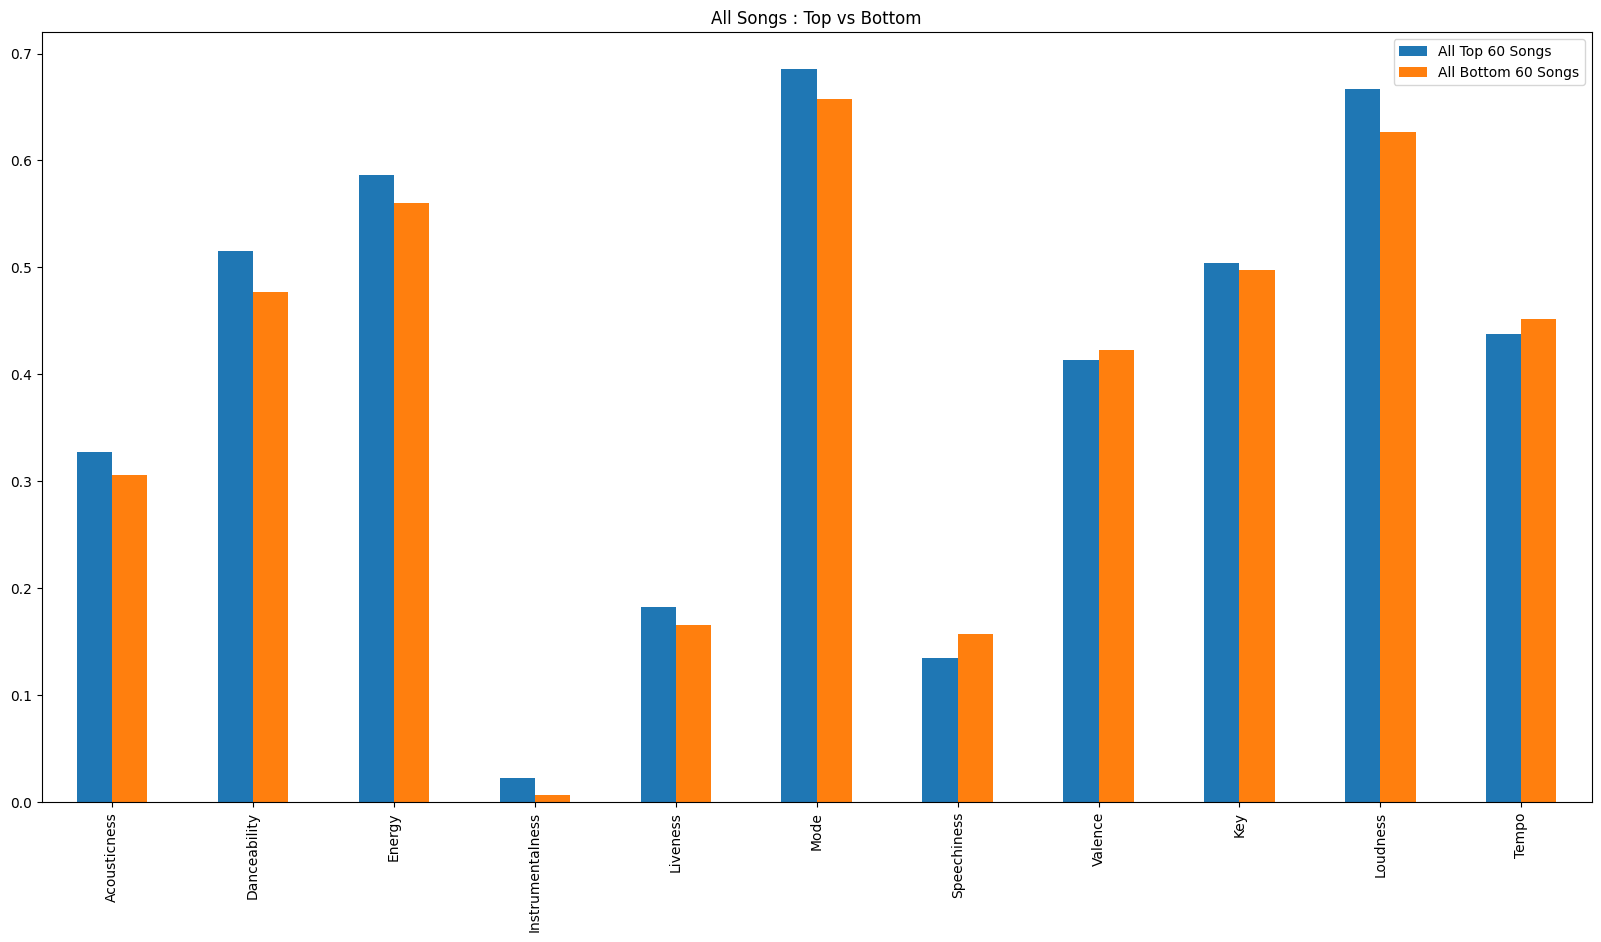

In [48]:
# Top 35
check = alls.sort_values(by = 'Popularity',ascending=False).head(70)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Top 60 Songs'])


# Bottom 35
check = alls.sort_values(by = 'Popularity',ascending=False).tail(70)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bottom = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['All Bottom 60 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([top, bottom], axis = 1)

top_bottom.plot(title = 'All Songs : Top vs Bottom', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: title={'center': 'Top Popular Songs : Bd vs Ind'}>

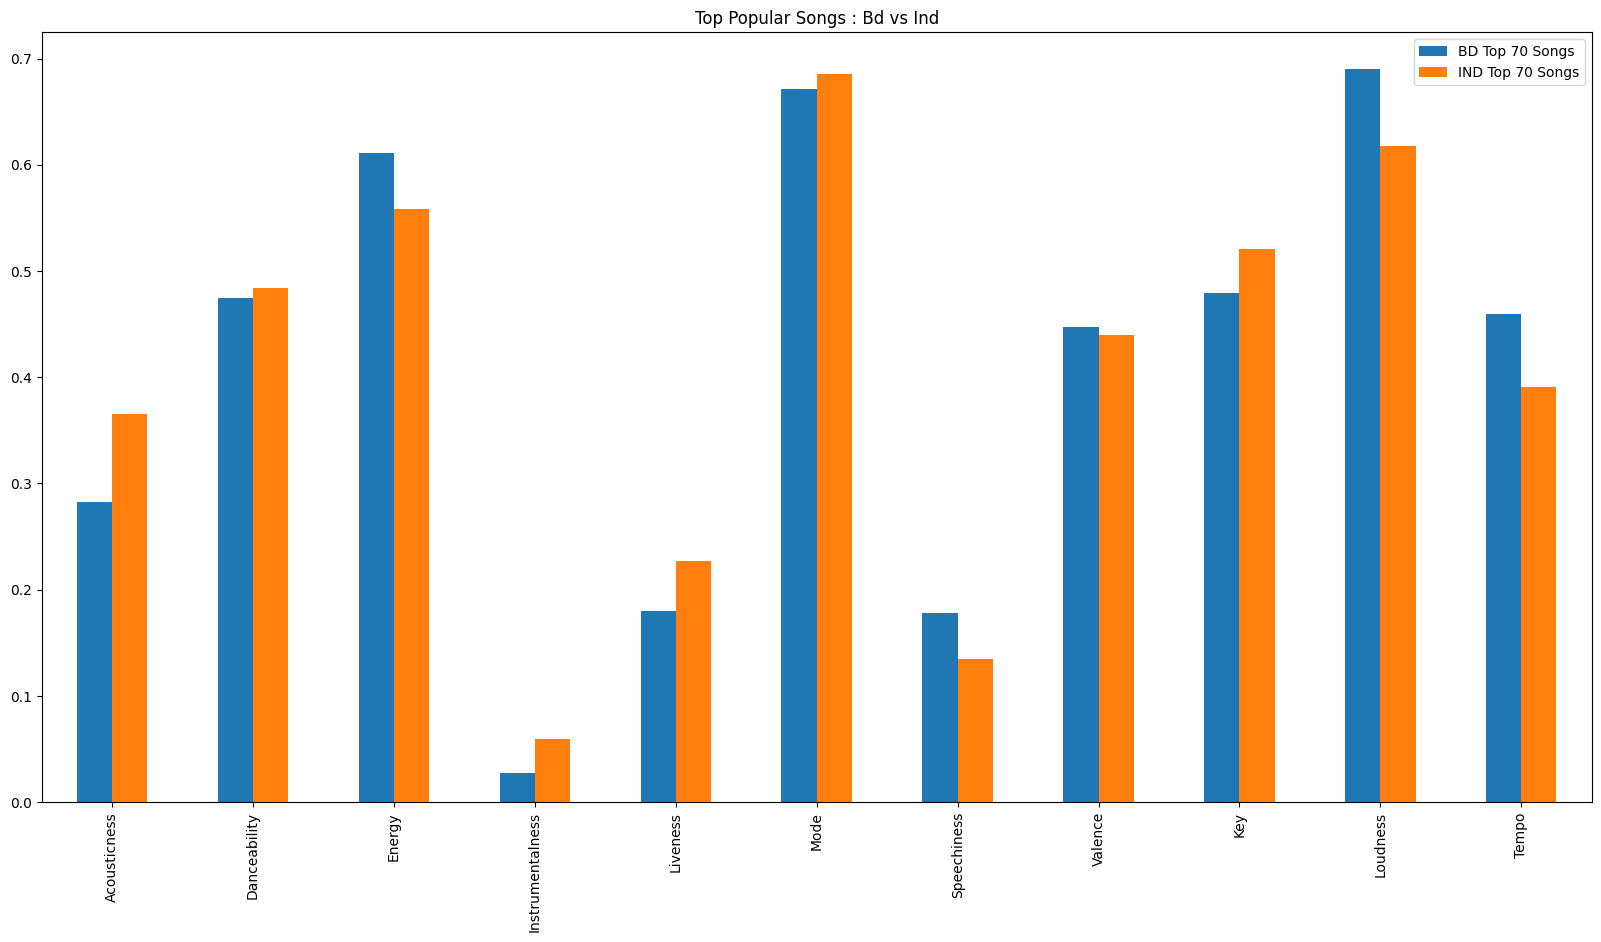

In [49]:
# Top 35
check = bd.sort_values(by = 'Popularity',ascending=False).head(70)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 70 Songs'])

# Mid 20
# check = audiodf[audiodf['Popularity'].between(audiodf['Popularity'].quantile(0.45),audiodf['Popularity'].quantile(0.55))]
# check = check[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence']].head(20)
# check = check.T
# mid = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Mid 20 Songs'])

# Bottom 35
check = ind.sort_values(by = 'Popularity',ascending=False).head(70)[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence','Key','Loudness','Tempo']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 70 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Top Popular Songs : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar' )

<AxesSubplot: title={'center': 'Popularity : Bd vs Ind'}>

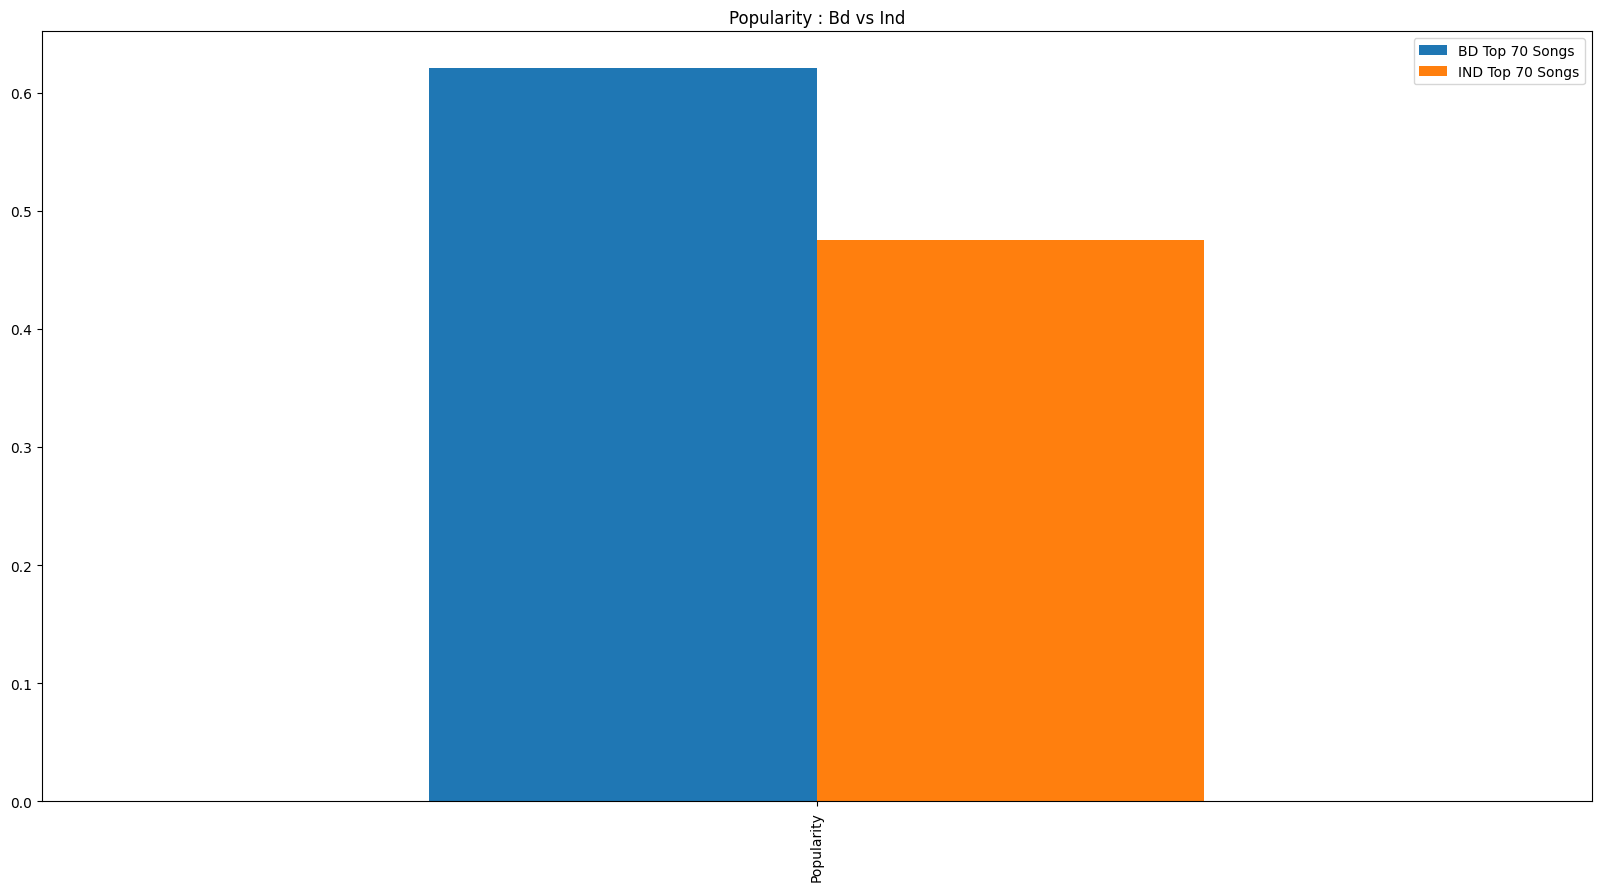

In [50]:
# Top 35
check = bd.sort_values(by = 'Popularity',ascending=False).head(70)[['Popularity']]
check = check.T
bd_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['BD Top 70 Songs'])

# Mid 20
# check = audiodf[audiodf['Popularity'].between(audiodf['Popularity'].quantile(0.45),audiodf['Popularity'].quantile(0.55))]
# check = check[['Acousticness', 'Danceability','Energy', 'Instrumentalness', 'Liveness', 'Mode','Speechiness', 'Valence']].head(20)
# check = check.T
# mid = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['Mid 20 Songs'])

# Bottom 35
check = ind.sort_values(by = 'Popularity',ascending=False).head(70)[['Popularity']]
check = check.T
ind_top = pd.DataFrame(check[check.columns].mean(axis = 1),columns = ['IND Top 70 Songs'])

# top_bottom = pd.concat([top,mid, bottom], axis = 1)
top_bottom = pd.concat([bd_top, ind_top], axis = 1)

top_bottom.plot(title = 'Popularity : Bd vs Ind', figsize=(20,10),linewidth=2,kind = 'bar')

<AxesSubplot: >

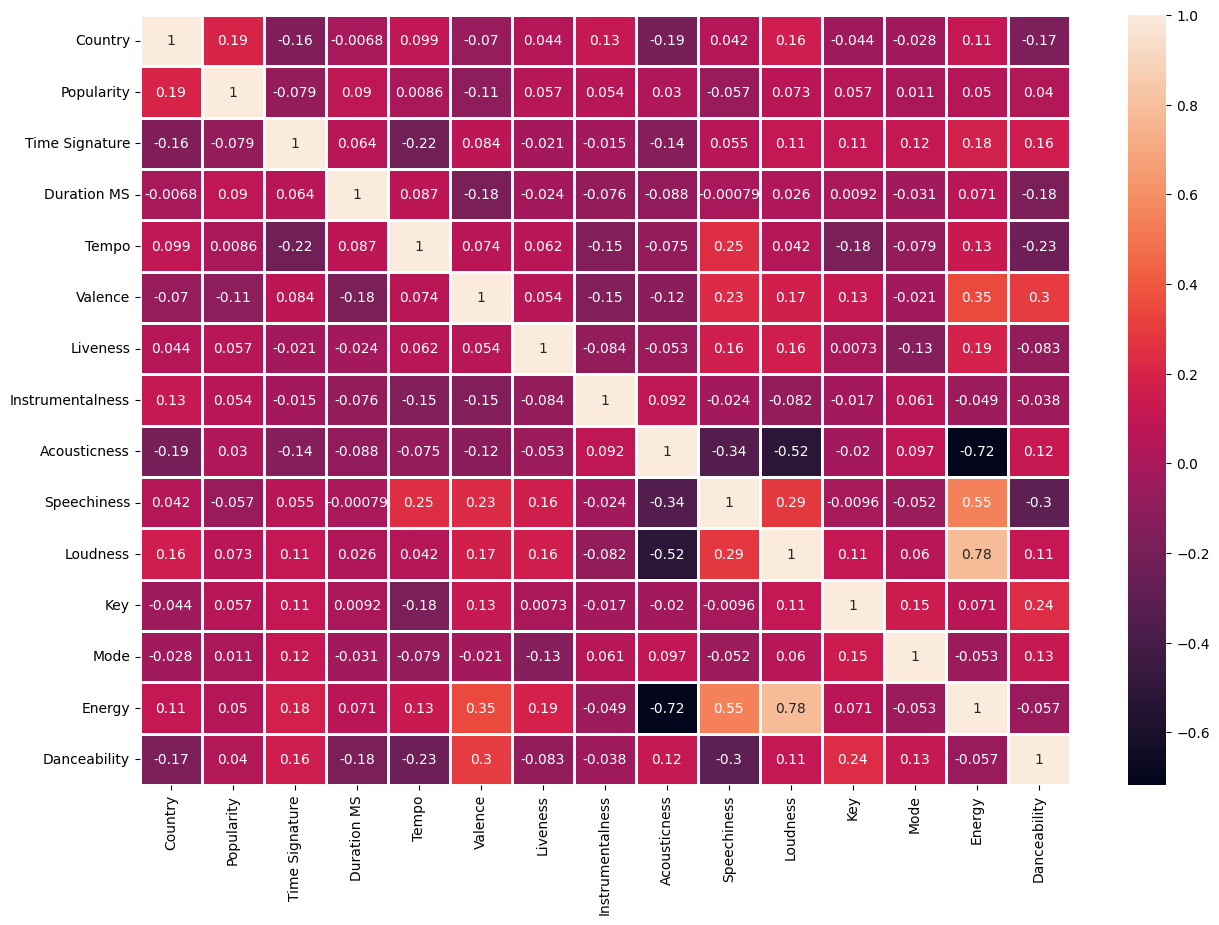

In [51]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(alls.corr(), annot=True,linewidths=.9, ax=ax)